<a href="https://colab.research.google.com/github/nishi-13/Machine-learning/blob/main/Artificial%20Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Joint Online Faculty Development programme on Deep Learning (Parallel Architecture) Aug 23 – Sep 3 , 2021



# Tutorial 3: Neural Network Classification

Dataset: [Pima Indian Diabetes Dataset](https://data.world/data-society/pima-indians-diabetes-database#)

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Attributes of PIMA dataset:

**Pregnancies**: Number of times pregnant

**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure**: Diastolic blood pressure (mm Hg)

**SkinThickness**: Triceps skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction**: Diabetes pedigree function

**Age**: Age (years)

**Outcome**: Class variable (0 or 1)

**1. Mount the Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Move to the place where data resides**

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!ls

 16397397439574137648366277021999.jpg
 16397397748753720546659151768852.jpg
'alexa skill'
'alexa skill department .gsheet'
'Ashutosh chouhan  (1).pdf'
'Ashutoshchouhan(CO-14)ADA(assignment).pdf'
'Ashutosh chouhan (CO-14).docx'
'Ashutosh chouhan Cybersecurity_Foundation_Student_Certificate.pdf'
'Ashutosh chouhan .pdf'
'ashutosh chouhan resume (1).pdf'
'ashutosh chouhan resume.pdf'
'Assignment - Alexa Skill Set.docx'
 Classroom
'Colab Notebooks'
'CSIT-1st yr.xlsx'
 CSO
'CSO practical file '
 custom_trainvalacc.png
 custom_trainvalloss.png
'Cyber security lab analysis.gdoc'
'DBMS Experiment List.gdoc'
 diabetes.csv
'DS Practical .pdf'
'G18- design and impelementation of exam software_CO04 CO14 CO26 CO54.docx'
'Getting started.pdf'
 IMG_20210520_113852.jpg
 IMG_20210601_164205.jpg
 IMG-20210724-WA0003.jpg
 IMG_20210929_152745.jpg
 IMG_20210929_153059.jpg
'IP DNS Subnet Mask.pptx'
'IWT +LINUX  Assignments and Lab work'
'Linux _Lab-CS505 File Format (1).gdoc'
'Linux _Lab-CS505 File Format (2

**3. Read the dataset from CSV file**

In [ ]:
import pandas as pd
data = pd.read_csv('diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

**4. Store the data into input feature and label variables**

In [ ]:
dataset= data.values
X = dataset[:,0:8]
Y = dataset[:,8]
print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

**5. Data Normalization**

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

**6. One-hot vector conversion**

In [ ]:
from keras.utils import np_utils
encoded_y = np_utils.to_categorical(Y)
encoded_y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

**7. Split the dataset into training, testing and validation set**

In [ ]:
from sklearn.model_selection import train_test_split
X_training, X_testing, Y_training, Y_testing = train_test_split(X_scale, encoded_y, test_size=0.4, random_state=10)
X_training, X_valid, Y_training, Y_valid = train_test_split(X_training, Y_training, test_size=0.4, random_state=10)
print(len(X_training))
print(len(X_testing))
print(len(X_valid))

276
308
184


**8. Model Creation**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Creating the model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()   #gives a summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 324
Trainable params: 324
Non-trainable params: 0
_________________________________________________________________


**9. Model Compile**

In [ ]:
from tensorflow.keras import optimizers
opt=optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

**10. Model Training**

if you have 1000 training examples, and your batch size is  500, then it will take 2 iterations to complete 1 epoch.

In [ ]:
hist = model.fit(X_training, Y_training,batch_size=16,  epochs=1000, validation_data=(X_valid,Y_valid))

Epoch 1/1000
18/18 [==============================] - 1s 15ms/step - loss: 0.6753 - accuracy: 0.6413 - val_loss: 0.6657 - val_accuracy: 0.6304
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.6594 - val_loss: 0.6561 - val_accuracy: 0.6359
Epoch 3/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6594 - val_loss: 0.6523 - val_accuracy: 0.6359
Epoch 4/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6474 - accuracy: 0.6594 - val_loss: 0.6491 - val_accuracy: 0.6359
Epoch 5/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6436 - accuracy: 0.6594 - val_loss: 0.6463 - val_accuracy: 0.6359
Epoch 6/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6400 - accuracy: 0.6594 - val_loss: 0.6425 - val_accuracy: 0.6359
Epoch 7/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6372 - accuracy: 0.6594 - val_loss: 0.6399 - val_accuracy: 0.6359
Epoch

**11. Plot the training loss and accuracy**

<Figure size 432x288 with 0 Axes>

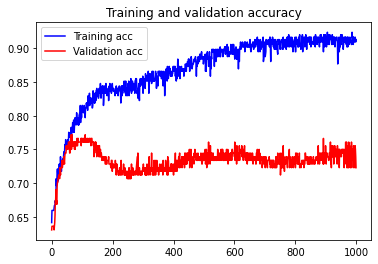

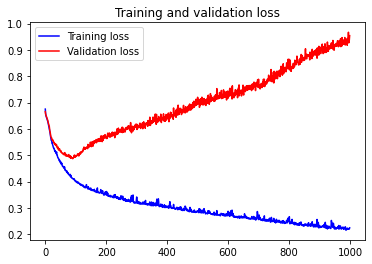

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt 
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('custom_trainvalacc.png')
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
#plt.show()
plt.savefig('custom_trainvalloss.png')
plt.figure()

**12. Evaluate the performance**

In [ ]:
res =model.evaluate(X_testing, Y_testing)

10/10 [==============================] - 0s 2ms/step - loss: 0.8198 - accuracy: 0.7727


**13. Predict on new datatset**


In [ ]:
test=X_testing[0]
y_act=Y_testing[0]
result=model.predict(test.reshape(1,8))
result

array([[0.5069922 , 0.49300775]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.round(result)
print("Actual:"+ str(y_act))
print("Predicted:"+str(y_pred))

Actual:[1. 0.]
Predicted:[[1. 0.]]


**Reference:** - https://keras.io/